In [6]:
import tensorflow as tf

## 加载MNIST数据集

In [27]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
X_train, y_train = mnist.train.images, mnist.train.labels
X_test, y_test = mnist.test.images, mnist.test.labels
X_validation, y_validation = mnist.validation.images, mnist.validation.labels

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [28]:
print("Image Shape: {}".format(X_train.shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(X_test)))

Image Shape: (55000, 784)

Training Set:   55000 samples
Validation Set: 5000 samples
Test Set:       10000 samples


由于LeNet的输入为32x32xC，而MNIST每张图像的尺寸为28x28，所以需要对图像四周进行填充

In [29]:
import numpy as np

# Pad images with 0s
X_train = np.array([np.pad(X_train[i].reshape((28, 28)), (2, 2), 'constant').reshape(-1) for i in range(len(X_train))])
X_validation = np.array([np.pad(X_validation[i].reshape((28, 28)), (2, 2), 'constant').reshape(-1) for i in range(len(X_validation))])
X_test = np.array([np.pad(X_test[i].reshape((28, 28)), (2, 2), 'constant').reshape(-1) for i in range(len(X_test))])
    
print("Updated Image Shape: {}".format(X_train.shape))

Updated Image Shape: (55000, 1024)


## MNIST数据可视化

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


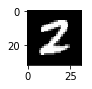

In [32]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze().reshape((32, 32))

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])

## 打乱数据

In [33]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)